In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pok=pd.read_csv('Downloads/pokemon.csv')

In [3]:
print(pok.shape)

(800, 13)


In [4]:
pok.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


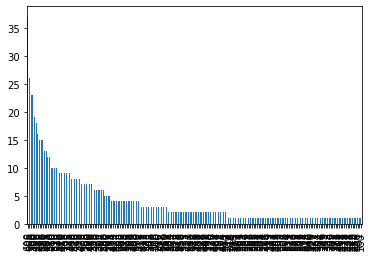

In [5]:
a=pok['Total'].value_counts().plot(kind='bar')
plt.show()

In [6]:
X = pok.drop(['Total'], axis = 1, inplace = False)
y = pok['Total']

### Description of data

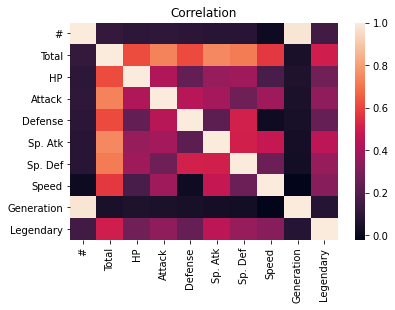

In [8]:
sns.heatmap(pok.corr())
plt.title('Correlation')
plt.show()

Text(0.5, 1.0, 'missing values plot')

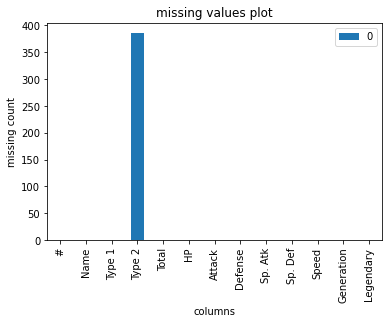

In [9]:
fig = pok.isnull().sum().reset_index().plot(kind='bar',x='index',y=0)
plt.xlabel('columns')
plt.ylabel('missing count')
plt.title('missing values plot')

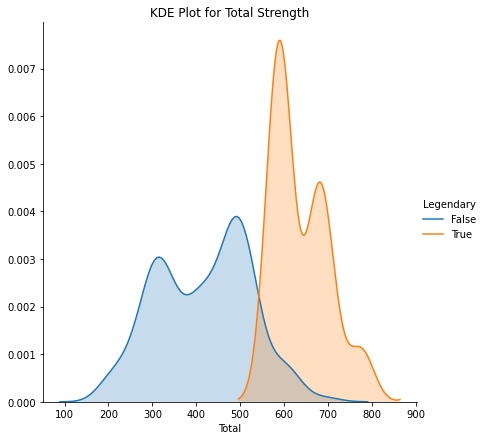

In [11]:
sns.FacetGrid(pok, hue="Legendary", height=6,).map(sns.kdeplot, "Total",shade=True).add_legend()
plt.title('KDE Plot for Total Strength')
plt.show()

In [ ]:
A bimodal distribution can be noticed for total strength values in case of both legendary and non legendary.

Looking at the data it can be confirmed that total is a summation of HP, 
Attack, Defense Sp., Atk Sp., Def, and Speed variables.

So I am not separately plotting the distributions of these variables rather I will be using a pairplot to denote them all.

Pairplot segregated on generation


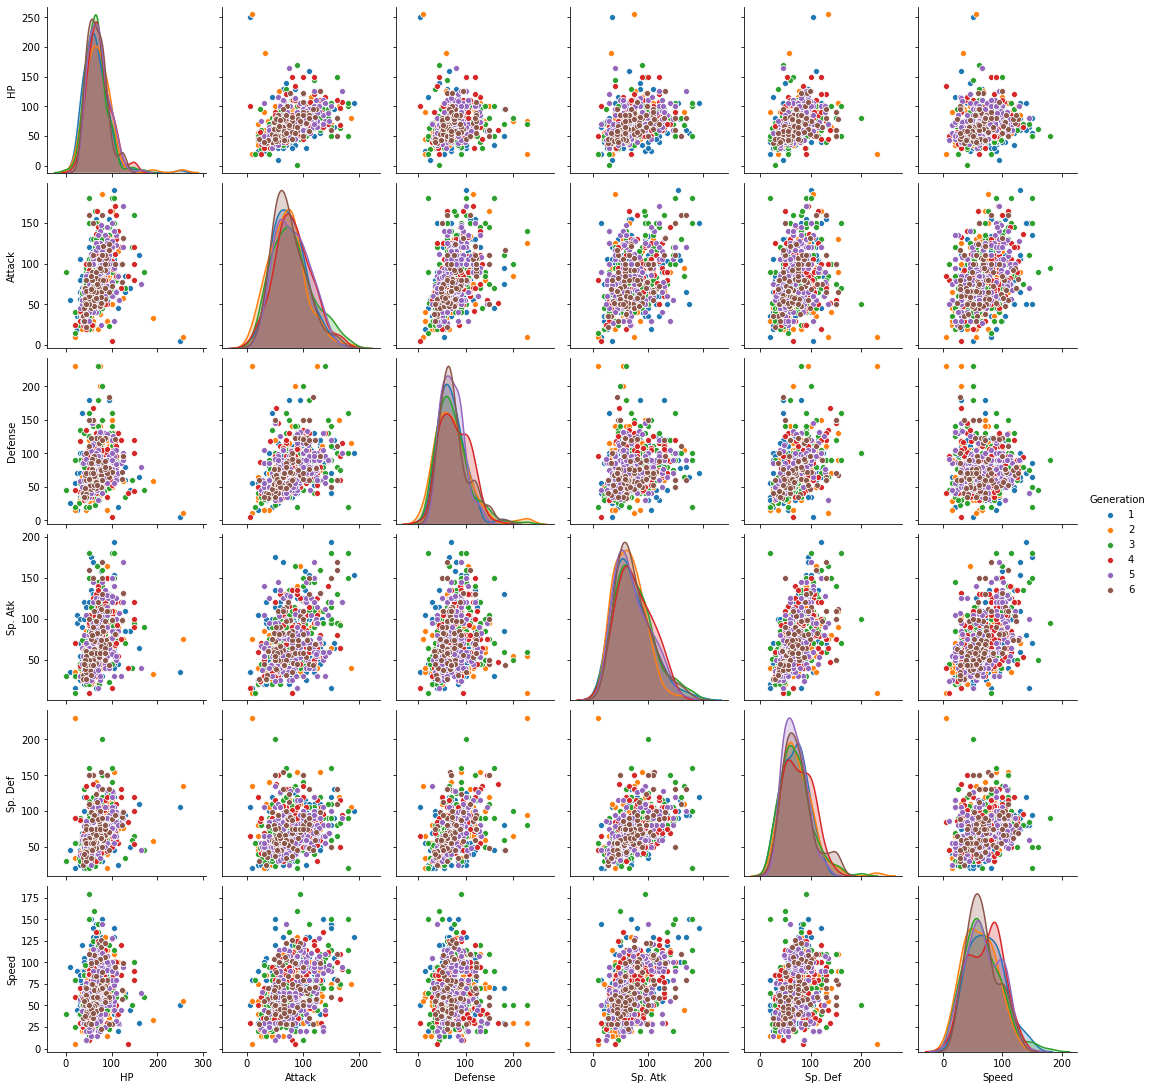

In [12]:
sns.pairplot(data=pok[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']], hue='Generation')
print('Pairplot segregated on generation')
plt.show()

Pairplot segregated on Legendariness


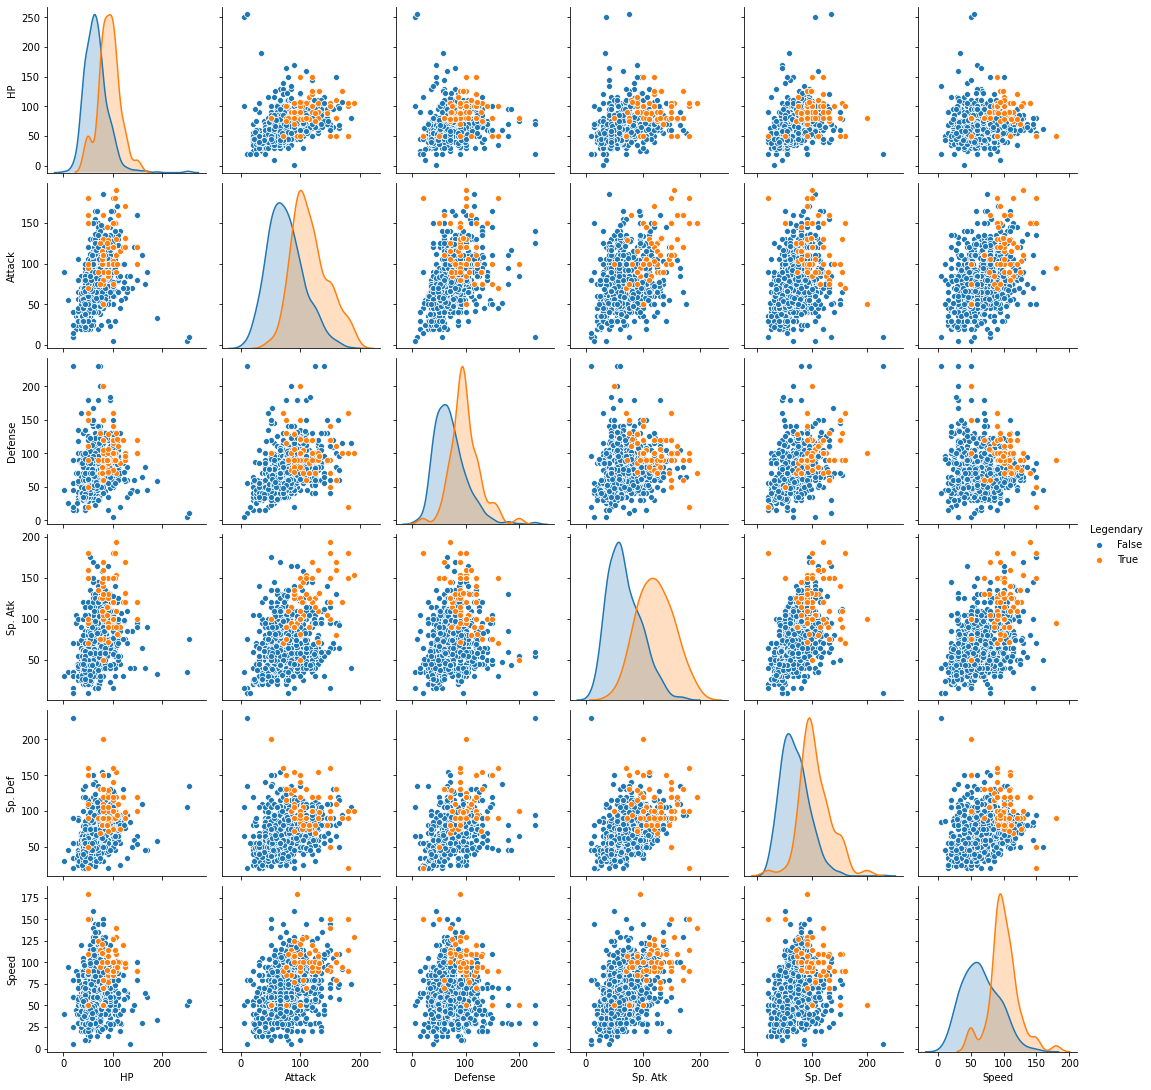

In [13]:
sns.pairplot(data=pok[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary']], hue='Legendary')
print('Pairplot segregated on Legendariness')
plt.show()

### Treating outliers

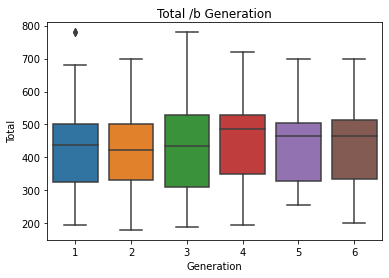

In [14]:
sns.boxplot(data=pok, x='Generation', y='Total')
plt.title('Total /b Generation')
plt.show()

 From the above boxplot few outliers can be noticed.

So it can be inferred that any generation 1 pokemon with total strength above 700 is an outlier to the data.

Let's take a look at the data remove it.

In [15]:
pok[(pok['Generation']==1) & (pok['Total']>700)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


In [16]:
On taking a look at the data though I can see that the outliers refer to Mewtwo, 
a legendary pokemon and it is totally justified for this pokemon to have the highest strength.

So I won't be dropping these indices.

SyntaxError: invalid syntax (<ipython-input-16-e8376f3a6a7d>, line 1)

In [ ]:
Rather than generation it seems that creating boxplots based on legenadary variable values will be more beneficial

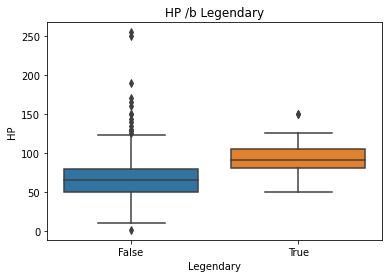

In [17]:
sns.boxplot(data=pok, x='Legendary', y='HP')
plt.title('HP /b Legendary')
plt.show()

In [ ]:
The above plot tells that any HP value greater than 130 is an outlier but considering the background of the data there are 
two things that mainly interest me.

1.HP values above 160
2.HP value closest to 0
Let's check more on this data.

In [18]:
pok[(pok['HP']>160) | (pok['HP']==pok['HP'].min())]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
655,594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False


In [ ]:
Out of the above data points visited the ones that aroused my interest are Chansey, Blissey and Shedninja.
Neither they are legendary nor they have any special ability that justifies their difference from other pokemons.
so lets drop this values.

In [19]:
#dropping 121, 261 and 316 indices in the dataset
data = pok.drop([121, 261, 316]).reset_index(drop=True)

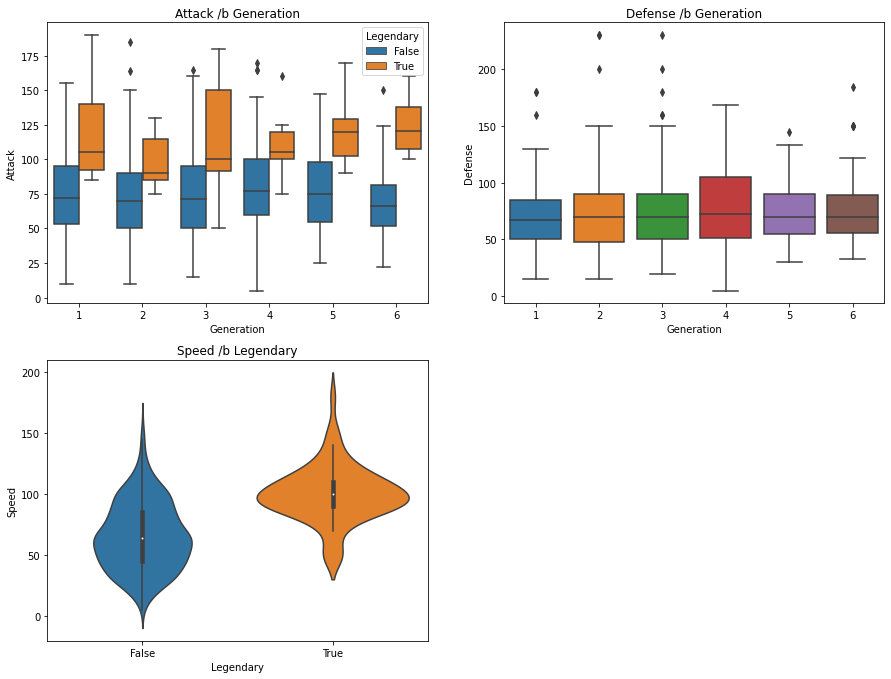

In [20]:
fig = plt.figure(figsize=(15,30))
fig.add_subplot(5,2,1)
sns.boxplot(data=data, x='Generation', y='Attack', hue='Legendary')
plt.title('Attack /b Generation')

fig.add_subplot(5,2,2)
sns.boxplot(data=data, x='Generation', y='Defense')
plt.title('Defense /b Generation')

fig.add_subplot(5,2,3)
sns.violinplot(data=data, x='Legendary', y='Speed')
plt.title('Speed /b Legendary')
plt.show()

In [ ]:
in the above plots on attack, defense and speed many outliers can be noticed but looking at the data those are 
justified thereand are not caused due to any mistake in data collection or gathering.

### Encoding categorical variable

In [21]:
data['Type 1'] = data['Type 1'].astype('category')

In [ ]:
Since the encoding is for clustering model, label encoding will be better in this case

In [22]:
from sklearn import preprocessing

In [23]:
le = preprocessing.LabelEncoder()
data['Type 1'] = le.fit_transform(data['Type 1'])

## Clustering the data

In [24]:
df = data.drop(['Name','Type 2','Generation','Legendary'], axis=1)

from sklearn.cluster import KMeans

X = np.array(df)

kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X)
df['cluster_label'] = pd.Series(list(kmeans.labels_))

Text(0.5, 1.0, 'Distribution of cluster labels')

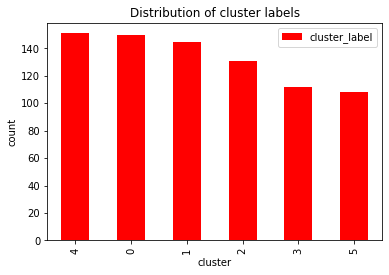

In [26]:
fig = df['cluster_label'].value_counts().reset_index().plot(kind='bar',x='index',y='cluster_label', color='r')
plt.xlabel("cluster")
plt.ylabel("count")
plt.title("Distribution of cluster labels")

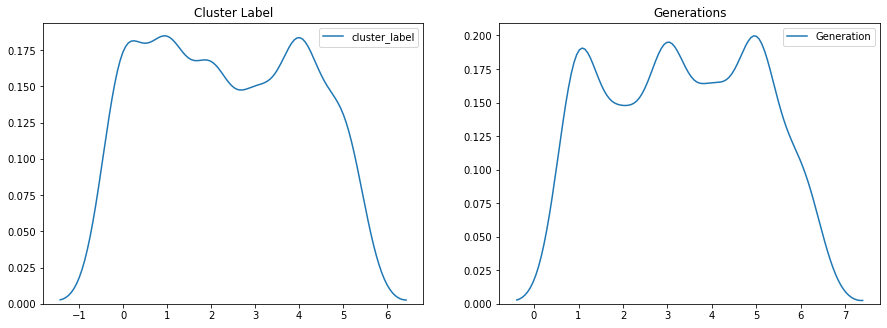

In [27]:
fig = plt.figure(figsize=(15,30))
fig.add_subplot(5,2,1)
sns.kdeplot(data=df['cluster_label'])
plt.title('Cluster Label')


fig.add_subplot(5,2,2)
sns.kdeplot(data=data['Generation'])
plt.title('Generations')

plt.show()

In [ ]:
It seems that the clustering was not accurate enough to capture the right counts of each of the category in 
the Generation variable.

But from the distribution a similarity can still be noticed between the two.

## Classifying pokemons

In [28]:
data = pd.read_csv('Downloads/Pokemon.csv')
data.drop(['#','Type 2'], axis=1, inplace=True)
data = data.drop([121, 261, 316]).reset_index(drop=True)

In [29]:
data.head()

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,309,39,52,43,60,50,65,1,False


In [30]:
#one-hot encoding
dummy = pd.get_dummies(data['Type 1'])
dummy.drop('Grass', axis=1, inplace=True) #dropping to avoid dummy variable trap
data = pd.concat([data, dummy], axis=1)
del data['Type 1'] #dropping the variable after encoded

In [31]:
Let's shuffle the dataset once since it seems the target variable is separated perfectly.

SyntaxError: EOL while scanning string literal (<ipython-input-31-48bc88ad6c1c>, line 1)

In [32]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

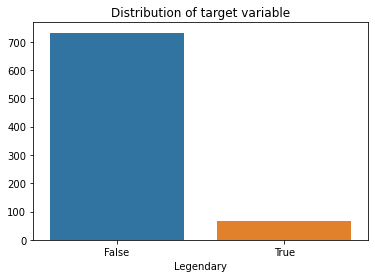

In [33]:
sns.barplot(data=data['Legendary'].value_counts().reset_index(), x='index', y='Legendary')
plt.xlabel('Legendary')
plt.ylabel('')
plt.title('Distribution of target variable')
plt.show()

In [ ]:
Let's drop the Name variable as well and then we can advance to splitting the data and building the model.

In [34]:
data.drop('Name', axis=1, inplace=True)


In [35]:
#splitting the data

from sklearn.model_selection import train_test_split

X = data.drop('Legendary', axis=1)
y = data['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [36]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve,accuracy_score,plot_confusion_matrix

In [37]:
model = DecisionTreeClassifier(max_depth=5, random_state=13)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of the Decision Tree is', accuracy_score(prediction, y_test))

The accuracy of the Decision Tree is 0.95


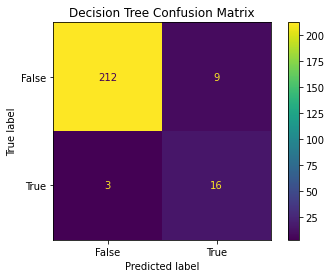

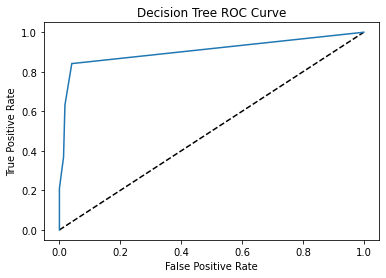

In [38]:
plot_confusion_matrix(model, X_test, y_test)
plt.title('Decision Tree Confusion Matrix')
plt.show()

model = DecisionTreeClassifier(max_depth=5, random_state=13)
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()

In [ ]:
The Decision Tree classifier is providing the best accuracy and I have checked if hypertuning further is 
increasing the score or not.

I used a decision tree since it is insensitive to outliers and there are many outliers in the data if considered
from the statistical point of view.

# final accuracy :95%